In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
%matplotlib inline
import umap
import seaborn as sns

In [3]:
reps = pd.read_table('../../Body/3Results/TandRepInfo.txt')

In [4]:
reps.head()

,Species,Start,End,CopyNumber,PercentMatches,Consensus,RepeatsRegion,FullLength,ConsensusLength,fr_A_cons,...,fr_C_repeat,Number,InDloop,GenomeLength,A,T,G,C,TAXON,taxonomy
0,Ablennes_hians,674,722,2.5,86,CGCCGTATACTGCTATAAAC,CGCCGTCATACTGCTATAAACCGCCGTATACTGCTTTATACCGCCTATA,48,20,6,...,16,1,0,16825,5047,4755,2465,4558,Actinopterygii,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...
1,Ablennes_hians,15999,16027,14.5,100,TA,TATATATATATATATATATATATATATAT,28,2,1,...,0,1,1,16825,5047,4755,2465,4558,Actinopterygii,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...
2,Abronia_graminea,15434,16016,5.4,99,CCAAAAGTAATGGAATATCCTCTACTATAGCCAACTCAGTTGGCTT...,CCAAAAGTAATGGAATATCCTCTACTATAGCCAACTCAGTTGGCTT...,582,107,35,...,140,1,1,16016,5408,4250,2105,4253,Reptilia,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...
3,Abronia_graminea,1,33,16.5,100,AT,ATATATATATATATATATATATATATATATATA,32,2,1,...,0,1,1,16016,5408,4250,2105,4253,Reptilia,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...
4,Acanthopagrus_latus,15773,15812,2.1,86,ACATATATTATGTAATAAC,ACATATATTCATGTATATAACACATATATTTGTAATAACA,39,19,9,...,5,1,1,16609,4572,4597,2781,4659,Actinopterygii,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...


In [5]:
data = reps[['CopyNumber', 'PercentMatches', 'FullLength', 'ConsensusLength', 'fr_A_cons', 'fr_T_cons', 'fr_G_cons',
            'fr_C_cons', 'fr_A_repeat', 'fr_T_repeat', 'fr_G_repeat', 'fr_C_repeat', 'InDloop']]

In [7]:
reducer = umap.UMAP()

In [14]:
embedding = reducer.fit_transform(data)
embedding.shape

/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(3841, 2)

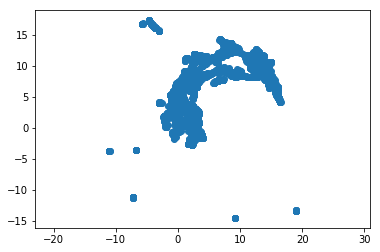

In [18]:
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')

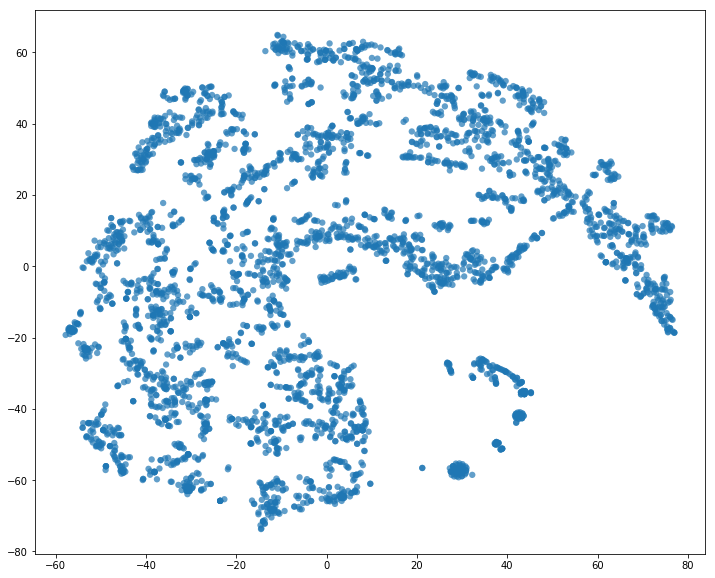

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(data)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

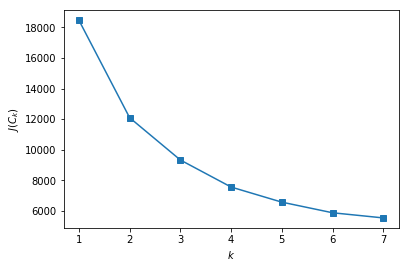

In [20]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=17).fit(data)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [22]:
kmeans = KMeans(n_clusters=4, random_state=17).fit(data)

In [23]:
kmeans.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [25]:
from collections import Counter

Counter(kmeans.labels_).keys() # equals to list(set(words))
Counter(kmeans.labels_).values() # counts the elements' frequency

dict_values([2626, 964, 229, 22])

In [27]:
reps['KmeansCluster'] = kmeans.labels_

In [29]:
clustering = SpectralClustering(random_state=17).fit(data)

/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/aragret/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:248: RuntimeWarning: overflow encountered in multiply
  distances *= -2
/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:248: RuntimeWarning: overflow encountered in multiply
  distances *= -2
/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/home/aragr

/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:444: RuntimeWarning: overflow encountered in square
  max_iter=max_iter, verbose=verbose)
/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:248: RuntimeWarning: overflow encountered in multiply
  distances *= -2
/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:250: RuntimeWarning: invalid value encountered in add
  distances += YY
/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:248: RuntimeWarning: overflow encountered in multiply
  distances *= -2
/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/home/aragret/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pa

In [30]:
np.max(clustering.labels_)

7

In [31]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [32]:
reps['SpecCluster'] = clustering.labels_

In [36]:
Counter(clustering.labels_).keys() # equals to list(set(words))
Counter(clustering.labels_).values() # counts the elements' frequency

dict_values([3837, 1, 1, 2])

In [37]:
reps.head()

,Species,Start,End,CopyNumber,PercentMatches,Consensus,RepeatsRegion,FullLength,ConsensusLength,fr_A_cons,...,InDloop,GenomeLength,A,T,G,C,TAXON,taxonomy,KmeansCluster,SpecCluster
0,Ablennes_hians,674,722,2.5,86,CGCCGTATACTGCTATAAAC,CGCCGTCATACTGCTATAAACCGCCGTATACTGCTTTATACCGCCTATA,48,20,6,...,0,16825,5047,4755,2465,4558,Actinopterygii,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...,0,0
1,Ablennes_hians,15999,16027,14.5,100,TA,TATATATATATATATATATATATATATAT,28,2,1,...,1,16825,5047,4755,2465,4558,Actinopterygii,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...,0,0
2,Abronia_graminea,15434,16016,5.4,99,CCAAAAGTAATGGAATATCCTCTACTATAGCCAACTCAGTTGGCTT...,CCAAAAGTAATGGAATATCCTCTACTATAGCCAACTCAGTTGGCTT...,582,107,35,...,1,16016,5408,4250,2105,4253,Reptilia,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...,1,0
3,Abronia_graminea,1,33,16.5,100,AT,ATATATATATATATATATATATATATATATATA,32,2,1,...,1,16016,5408,4250,2105,4253,Reptilia,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...,0,0
4,Acanthopagrus_latus,15773,15812,2.1,86,ACATATATTATGTAATAAC,ACATATATTCATGTATATAACACATATATTTGTAATAACA,39,19,9,...,1,16609,4572,4597,2781,4659,Actinopterygii,Eukaryota_Metazoa_Chordata_Craniata_Vertebrata...,0,0


In [34]:
reps.to_csv('../../Body/3Results/TandRepInfoClusters.csv')

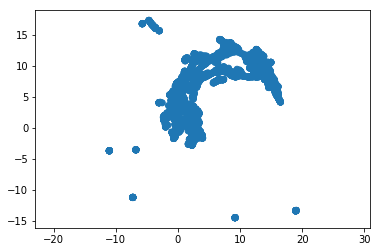

In [38]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in reps.SpecCluster])
plt.gca().set_aspect('equal', 'datalim')

Text(0.5, 1.0, '')

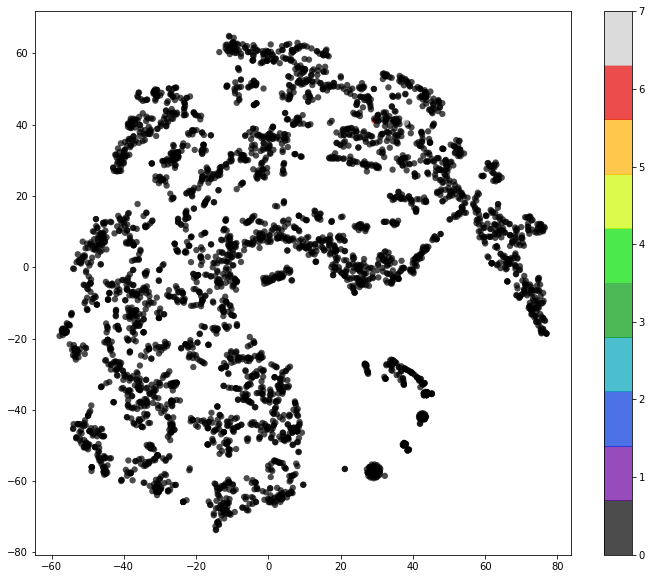

In [42]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(data)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=reps.SpecCluster, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('')

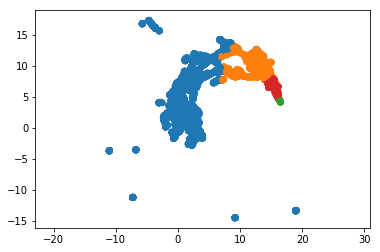

In [41]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in reps.KmeansCluster])
plt.gca().set_aspect('equal', 'datalim')

Text(0.5, 1.0, '')

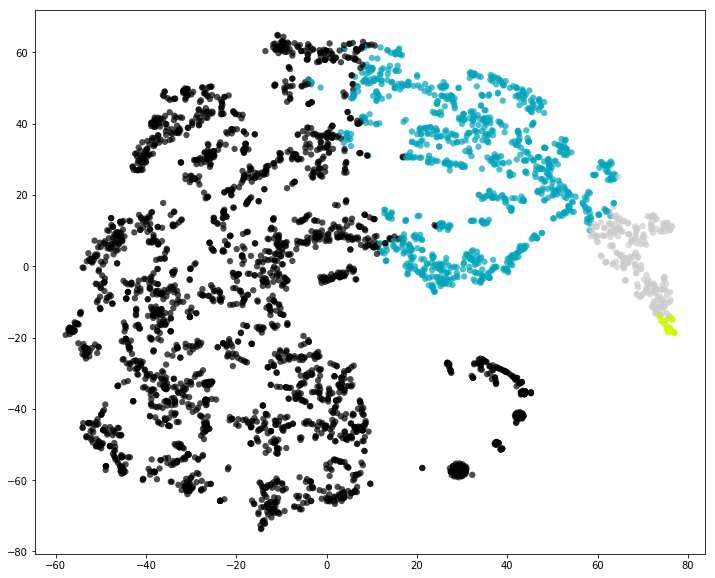

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(data)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=reps.KmeansCluster, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 4))
# plt.colorbar()
plt.title('')